This note book compare the results using traditional illumination updates and the proposed pairwise update

In [1]:
import cupy as xp
import numpy as np

In [2]:
from Operators import Replicate_frame, Illuminate_frames
from Operators import Split_Overlap_plan,make_probe
import matplotlib.pyplot as plt
import h5py
import matplotlib.pyplot as plt

In [2]:
%run -i ptycho_simulate.py 

type0 <class 'cupy.ndarray'> int64


## True illumination

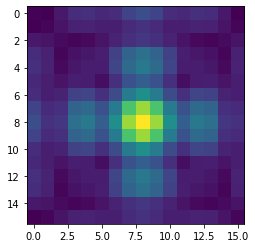

In [4]:
nx = 16
ny = 16
illumination = make_probe(nx, ny, r1=0.02*3, r2=0.06*3, fx=+20, fy=-20)
plt.imshow(abs(illumination.get()))
plt.show()

In [5]:
print(type(illumination))

<class 'cupy.ndarray'>


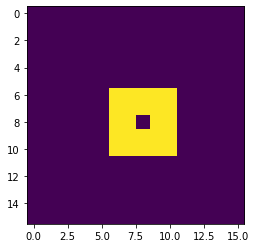

In [13]:
Fprobe = abs(np.fft.ifftshift(np.fft.fft2(illumination.get())))>1e-8
plt.imshow(Fprobe)

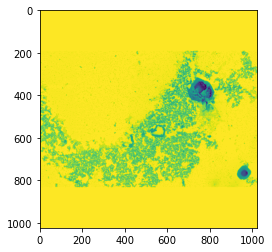

In [17]:
from PIL import Image
img0 = np.array(Image.open("../data/gold_balls.png"), np.float32) / 63.0
#img0=img0+1j # simple complex
#img0 = np.exp(0.69 * (-1 + 0.5 * 1j) * img0)  # more realistic
img0 = np.exp(0.01 * (-1 + 0.5 * 1j) * img0)  # increase for more contrast
plt.imshow(np.abs(img0))

In [4]:
print(img0)

[[1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 ...
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]]


## illumination refinement using traditional method

using GPU
loaded data, memory used, and total: 10140672 13006848
normalized by data.nbytes memory used and total normalized: 38.68359375 49.6171875
data size 262144
----
Split and Overlap, memory used, and total: 10140672 13006848
normalized by data.nbytes memory used and total normalized: 38.68359375 49.6171875
data size 262144
----
geometry: img size: (77, 77) frames: (16, 16, 256)
not refining illumination, starting with good one, maxiter: 1000
start AP memory used, and total: 10190336 13006848
normalized by data.nbytes memory used and total normalized: 38.873046875 49.6171875
data size 262144
----
after Prox_data, memory used, and total: 10193408 13006848
normalized by data.nbytes memory used and total normalized: 38.884765625 49.6171875
----


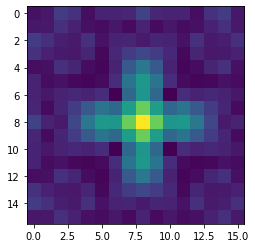

after frames initial, memory used, and total: 10772480 13006848
normalized by data.nbytes memory used and total normalized: 41.09375 49.6171875
----
start loop, memory used, and total: 10789376 13006848
normalized by data.nbytes memory used and total normalized: 41.158203125 49.6171875
----


  0%|          | 0/1000 [00:00<?, ?it/s]

refining illum traditional,using lens mask


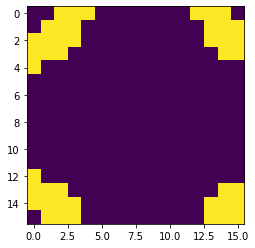

100%|██████████| 1000/1000 [00:02<00:00, 344.93it/s]


end of loop, memory used, and total/1e9: 0.011364864 0.014055424
normalized by data.nbytes memory used and total normalized: 43.353515625 53.6171875
----
10


In [ ]:
fname_in ="refine_illum.h5"
%run -i ptycho_reconstruct.py 

In [ ]:
fname_in ="poster_32x32.h5"
%run -i ptycho_reconstruct.py 

## Pairwise sync

using GPU
loaded data, memory used, and total: 1281024 1282560
normalized by data.nbytes memory used and total normalized: 1.2216796875 1.22314453125
data size 1048576
----
Split and Overlap, memory used, and total: 1281024 1282560
normalized by data.nbytes memory used and total normalized: 1.2216796875 1.22314453125
data size 1048576
----
geometry: img size: (157, 157) frames: (16, 16, 1024)
not refining illumination, starting with good one, maxiter: 30
start AP memory used, and total: 4340224 36934144
normalized by data.nbytes memory used and total normalized: 4.13916015625 35.22314453125
data size 1048576
----
after Prox_data, memory used, and total: 4349440 36934144
normalized by data.nbytes memory used and total normalized: 4.14794921875 35.22314453125
----


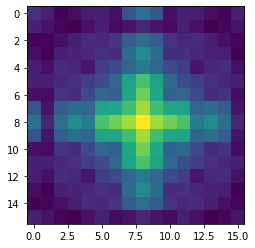

!!!inorm False
after frames initial, memory used, and total: 8757248 36934144
normalized by data.nbytes memory used and total normalized: 8.3515625 35.22314453125
----
start loop, memory used, and total: 8766464 36934144
normalized by data.nbytes memory used and total normalized: 8.3603515625 35.22314453125
----


  0%|          | 0/30 [00:00<?, ?it/s]


UnboundLocalError: cannot access local variable 'illumination' where it is not associated with a value

In [3]:
#fname_in ="poster_32x32.h5"
%run -i ptycho_reconstruct.py 